In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix, accuracy_score, classification_report, precision_recall_fscore_support, roc_curve
from sklearn.model_selection import StratifiedKFold,KFold

In [4]:
dataset = pd.read_csv('E:\Data Mining\S2\Projek Akhir\dataset.csv')

In [4]:
dataset.head()

,CID,Accession,class,1,2,3,4,5,6,7,...,M,N,P,Q,R,S,T,V,W,Y
0,11671467,Q9UHD2,1,1,1,1,0,0,0,0,...,0.030178,0.041152,0.032922,0.038409,0.048011,0.057613,0.061728,0.061728,0.009602,0.038409
1,57469,Q9UHD2,0,1,1,1,0,0,0,0,...,0.030178,0.041152,0.032922,0.038409,0.048011,0.057613,0.061728,0.061728,0.009602,0.038409
2,46831374,Q9UHD2,0,1,1,1,0,0,0,0,...,0.030178,0.041152,0.032922,0.038409,0.048011,0.057613,0.061728,0.061728,0.009602,0.038409
3,44592367,Q9UHD2,0,1,1,1,0,0,0,0,...,0.030178,0.041152,0.032922,0.038409,0.048011,0.057613,0.061728,0.061728,0.009602,0.038409
4,46831378,Q9UHD2,0,1,1,1,0,0,0,0,...,0.030178,0.041152,0.032922,0.038409,0.048011,0.057613,0.061728,0.061728,0.009602,0.038409


In [5]:
my_input_matrix=dataset.drop(['CID','Accession','class'],axis=1)

In [6]:
my_label_vector=dataset['class']

In [7]:
clf = RandomForestClassifier(random_state=0)

In [8]:
clf.fit(my_input_matrix,my_label_vector)

RandomForestClassifier(random_state=0)

In [9]:
jumlah =0
importance=[]
for i in range(len(my_input_matrix.columns)):
    if(clf.feature_importances_[i]>0):
        print(my_input_matrix.columns[i],clf.feature_importances_[i])
        importance.append(my_input_matrix.columns[i])
        jumlah=jumlah+1
print(jumlah)

1 0.0001509630481910932
2 0.00035520522936084394
3 0.0026577079312961305
4 0.0026175145944521434
7 3.1276701962414245e-05
10 8.102244513150354e-05
11 9.996488722601555e-05
12 0.00032401149087055934
13 0.0018846118509535362
14 0.0022513383022057143
15 0.0005058812417116154
16 0.002377636363058823
17 0.0028032801811883534
18 0.002503949476832492
19 0.0008670741200308543
20 0.0021080528669284522
21 0.002772798101572557
22 0.0026640050651014404
23 0.00011723331641006202
24 0.0015474027084831892
25 0.001100414211162187
26 0.00047225810261884997
27 0.0007746469871046159
28 2.182534346056067e-05
29 1.6944293749084944e-06
31 0.000565446958801996
32 0.00011965507520204749
33 5.862866123989285e-05
34 0.0014895536094753203
35 0.0005195704674822369
36 3.006885821477817e-05
38 0.0009080610209832433
39 0.0010832754636133108
40 0.0001092015325465955
44 0.0004180392601405778
45 0.00011021908709602868
46 1.587473648528128e-06
47 0.00010060269100187411
48 6.074035580854828e-05
49 4.270675460424844e-05
6

508 0.0010078895121735506
509 0.0006047354084342346
510 0.0003034487227826654
511 8.778274392485762e-05
512 0.0008404440810373758
514 0.0003508951765411765
515 0.0007816802037169258
516 0.0014388545201363518
517 0.0008015924712870769
518 0.0008168959327996764
519 0.000497717207205025
520 0.0011879379423221108
521 0.0005326669632990538
522 0.0012231174789635525
523 0.000949553742968261
524 0.0016767799611003675
525 0.0003860616609211468
527 9.741237749443497e-05
528 0.0021067262063955896
529 0.007178119747472336
530 9.061482993691552e-05
531 0.0012844770110850318
532 0.0007656919588707428
533 0.000913721367400359
534 0.0003545663091582316
535 0.00022406750266856166
536 0.0019350501186915494
537 0.0039387154380626605
538 0.0012181913027131082
539 0.0017933303958307678
540 0.001321368665150862
541 0.0025892832401253267
542 0.0008857069128340983
543 0.0007560917482964866
544 0.0009469701554774669
545 0.0005230777458165466
546 0.0012011557942159293
547 0.0012807755193046117
548 0.0015146536

840 0.0005079055212452246
841 0.00034755206265342574
843 0.00039644667828254385
846 0.00015281340922546822
848 1.4302560750626046e-05
861 0.0005942574025596039
862 0.00029080139925572704
864 0.00042358651602224684
867 0.00010707238809097787
869 2.5224611497949344e-05
A 0.01468922825178363
C 0.018588951699472948
D 0.015579367835511565
E 0.020929995128201026
F 0.020106071621627798
G 0.022263209597039767
H 0.01329083008567742
I 0.024219010841149222
K 0.014172710565228636
L 0.02408950161358666
M 0.022251116854948114
N 0.01856265670260251
P 0.021946573762174636
Q 0.01515895204305321
R 0.015914218644019876
S 0.01993105552862077
T 0.01590470457053153
V 0.013981620918629457
W 0.0165905232958883
Y 0.018816805567750297
670


In [10]:
importance

['1',
 '2',
 '3',
 '4',
 '7',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '38',
 '39',
 '40',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '62',
 '63',
 '66',
 '67',
 '83',
 '94',
 '95',
 '114',
 '116',
 '117',
 '118',
 '119',
 '123',
 '124',
 '130',
 '131',
 '132',
 '133',
 '137',
 '138',
 '140',
 '144',
 '145',
 '146',
 '147',
 '151',
 '152',
 '153',
 '154',
 '158',
 '160',
 '161',
 '165',
 '167',
 '168',
 '172',
 '174',
 '175',
 '179',
 '180',
 '181',
 '182',
 '186',
 '187',
 '188',
 '189',
 '193',
 '194',
 '195',
 '196',
 '200',
 '201',
 '202',
 '203',
 '207',
 '208',
 '209',
 '210',
 '214',
 '215',
 '216',
 '217',
 '221',
 '224',
 '228',
 '229',
 '230',
 '231',
 '235',
 '242',
 '243',
 '244',
 '245',
 '249',
 '250',
 '251',
 '252',
 '256',
 '257',
 '258',
 '259',
 '260',
 '261',
 '262',
 '263',
 '275',
 '276',
 '277',
 '278',
 '284',
 '285',
 '28

In [7]:
xgboost = xgb.XGBClassifier(random_state=0)

In [8]:
xgboost.fit(my_input_matrix,my_label_vector)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [9]:
jumlah2 =0
importance2=[]
for i in range(len(my_input_matrix.columns)):
    if(xgboost.feature_importances_[i]>0):
        print(my_input_matrix.columns[i],xgboost.feature_importances_[i])
        importance2.append(my_input_matrix.columns[i])
        jumlah2=jumlah2+1
print(jumlah2)

1 0.000499967
2 0.00024061424
3 0.0020926378
4 0.0050516175
10 0.0001870047
11 0.00028345615
12 0.0010107459
13 0.0018792743
14 0.0019060015
15 0.002003519
16 0.0038042837
17 0.003928135
18 0.010616256
19 0.0011956682
20 0.0014132776
21 0.0018067971
22 0.0039562364
23 9.346682e-05
24 0.0031430572
25 0.00087803195
26 0.0003390835
27 0.0025081642
31 0.0018382323
32 0.0021721171
34 0.0010802329
35 0.0010689694
39 0.0020405664
40 0.00010426917
44 0.0013122582
47 0.00013064194
48 0.00058379426
49 0.00011419448
62 5.8438436e-05
66 0.0008972882
116 0.0005254278
119 0.0010926235
130 0.0004971905
132 0.0003178554
144 0.0007333353
145 0.00089568103
146 0.00063737936
147 0.0032329955
151 0.0029824488
153 0.0047467873
154 0.001575075
158 0.0011483543
160 0.00016941322
179 0.0028719367
180 0.00081575173
181 0.002112575
182 0.0015827573
186 0.004104868
187 0.0012230771
188 0.0011907722
189 0.0034714092
193 0.0013965819
194 0.001096572
195 0.003840685
200 0.0016830176
201 0.00060400047
207 0.00102627

In [14]:
importance2

['1',
 '2',
 '3',
 '4',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '31',
 '32',
 '34',
 '35',
 '39',
 '40',
 '44',
 '47',
 '48',
 '49',
 '62',
 '66',
 '116',
 '119',
 '130',
 '132',
 '144',
 '145',
 '146',
 '147',
 '151',
 '153',
 '154',
 '158',
 '160',
 '179',
 '180',
 '181',
 '182',
 '186',
 '187',
 '188',
 '189',
 '193',
 '194',
 '195',
 '200',
 '201',
 '207',
 '208',
 '214',
 '215',
 '216',
 '221',
 '228',
 '230',
 '231',
 '242',
 '244',
 '245',
 '249',
 '250',
 '251',
 '252',
 '256',
 '257',
 '258',
 '259',
 '260',
 '261',
 '262',
 '263',
 '285',
 '286',
 '287',
 '288',
 '294',
 '300',
 '301',
 '302',
 '306',
 '309',
 '315',
 '333',
 '334',
 '335',
 '336',
 '337',
 '338',
 '339',
 '340',
 '341',
 '342',
 '346',
 '347',
 '348',
 '350',
 '353',
 '354',
 '356',
 '357',
 '358',
 '359',
 '360',
 '363',
 '364',
 '365',
 '366',
 '367',
 '368',
 '369',
 '371',
 '373',
 '374',
 '375',
 '376',
 '377',
 '378'

In [11]:
feature_selected2=dataset[importance2]

In [12]:
from imblearn.under_sampling import RandomUnderSampler

In [14]:
rus = RandomUnderSampler(sampling_strategy=0.2)
# X_res, y_res = rus.fit_resample(feature_selected1,my_label_vector)
X_res2, y_res2 = rus.fit_resample(feature_selected2,my_label_vector)

In [52]:
print(X_res.shape, y_res.shape)
print(pd.value_counts(y_res))

(24540, 670) (24540,)
0    20450
1     4090
Name: class, dtype: int64


In [91]:
interaksi_notfound_sisa = feature_selected2[~feature_selected2.isin(X_res)].dropna().reset_index(drop = True)
interaksi_notfound_sisa_class = [0]*interaksi_notfound_sisa.shape[0]

In [25]:
df_rus = pd.DataFrame(X_res, columns = importance)
df_rus.head()

,1,2,3,4,7,10,11,12,13,14,...,M,N,P,Q,R,S,T,V,W,Y
0,1,1,1,0,0,1,1,1,1,0,...,0.016334,0.045372,0.027223,0.036298,0.047187,0.098004,0.059891,0.043557,0.005445,0.032668
1,1,1,1,0,0,1,1,1,1,0,...,0.030178,0.041152,0.032922,0.038409,0.048011,0.057613,0.061728,0.061728,0.009602,0.038409
2,1,1,1,0,0,1,1,1,1,0,...,0.030755,0.052190,0.037279,0.027959,0.051258,0.065238,0.068034,0.060578,0.012116,0.047530
3,1,1,1,1,0,1,1,1,1,1,...,0.034234,0.037838,0.055856,0.028829,0.055856,0.055856,0.050450,0.066667,0.025225,0.039640
4,1,1,1,0,0,1,1,1,1,0,...,0.010076,0.041562,0.060453,0.051637,0.057935,0.076826,0.069270,0.073048,0.021411,0.027708


In [53]:
#Train Val Test split dari hasil ekstraksi fitur RF
from sklearn.model_selection import train_test_split
def train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, 
    random_state=None, shuffle=True):
    assert int(train_size + val_size + test_size + 1e-7) == 1
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val,    test_size=val_size/(train_size+val_size), 
        random_state=random_state, shuffle=shuffle)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X_res, y_res, train_size=0.8, val_size=0.1, test_size=0.1, random_state=1)

In [54]:
#Build model XGB dari hasil ekstraksi fitur RF
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

model = xgb.XGBClassifier(random_state=0)
model.fit(X_train, y_train)
#Predict on validation
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_val, y_pred))
print('ROC AUC score:',roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2083
           1       0.94      0.93      0.94       371

    accuracy                           0.98      2454
   macro avg       0.96      0.96      0.96      2454
weighted avg       0.98      0.98      0.98      2454

accuracy 0.980440097799511
ROC AUC score: 0.9607863942866979


In [55]:
#Predict on test 
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy', accuracy_score(y_test, y_pred))
print('ROC AUC score:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2063
           1       0.94      0.93      0.94       391

    accuracy                           0.98      2454
   macro avg       0.96      0.96      0.96      2454
weighted avg       0.98      0.98      0.98      2454

Accuracy 0.9800325998370009
ROC AUC score: 0.9601411050626494


In [94]:
#Train Val Test split dari hasil ekstraksi fitur XGB
from sklearn.model_selection import train_test_split
def train_validation_test_split(
    X, y, train_size=0.7, val_size=0.1, test_size=0.2, 
    random_state=None, shuffle=True):
    assert int(train_size + val_size + test_size + 1e-7) == 1
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val,    test_size=val_size/(train_size+val_size), 
        random_state=random_state, shuffle=shuffle)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X_res2, y_res2, train_size=0.7, val_size=0.1, test_size=0.2, random_state=1)

In [57]:
#Build model XGB dari hasil ekstraksi fitur XGB
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

model = xgb.XGBClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
#Predict on validation
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_val, y_pred))
print('ROC AUC score:',roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2083
           1       0.93      0.93      0.93       371

    accuracy                           0.98      2454
   macro avg       0.96      0.96      0.96      2454
weighted avg       0.98      0.98      0.98      2454

accuracy 0.9796251018744906
ROC AUC score: 0.9603063174744078


In [59]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy', accuracy_score(y_test, y_pred))
print('ROC AUC score:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2063
           1       0.94      0.94      0.94       391

    accuracy                           0.98      2454
   macro avg       0.96      0.96      0.96      2454
weighted avg       0.98      0.98      0.98      2454

Accuracy 0.980440097799511
ROC AUC score: 0.9624562843325278


In [60]:
#apply to original datasets
y_pred = model.predict(feature_selected2)
print(classification_report(my_label_vector, y_pred))
print('Accuracy:', accuracy_score(my_label_vector, y_pred))
print('ROC AUC score:', roc_auc_score(my_label_vector, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99    138398
           1       0.73      0.98      0.84      4090

    accuracy                           0.99    142488
   macro avg       0.87      0.99      0.92    142488
weighted avg       0.99      0.99      0.99    142488

Accuracy: 0.989227162989164
ROC AUC score: 0.9869802925837609


In [61]:
model2 = RandomForestClassifier(random_state=0)
model2.fit(X_train, y_train)
#Predict on validation
y_pred = model2.predict(X_val)
print(classification_report(y_val, y_pred))
print('accuracy', accuracy_score(y_val, y_pred))
print('ROC AUC score:',roc_auc_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2083
           1       0.94      0.93      0.93       371

    accuracy                           0.98      2454
   macro avg       0.96      0.96      0.96      2454
weighted avg       0.98      0.98      0.98      2454

accuracy 0.9796251018744906
ROC AUC score: 0.9580909764969403


In [62]:
#Predict on test 
y_pred = model2.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy', accuracy_score(y_test, y_pred))
print('ROC AUC score:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2063
           1       0.95      0.94      0.95       391

    accuracy                           0.98      2454
   macro avg       0.97      0.97      0.97      2454
weighted avg       0.98      0.98      0.98      2454

Accuracy 0.9837000814995925
ROC AUC score: 0.967504428903851


In [63]:
#apply to original datasets
y_pred = model2.predict(feature_selected2)
print(classification_report(my_label_vector, y_pred))
print('Accuracy:', accuracy_score(my_label_vector, y_pred))
print('ROC AUC score:', roc_auc_score(my_label_vector, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00    138398
           1       0.78      0.99      0.87      4090

    accuracy                           0.99    142488
   macro avg       0.89      0.99      0.93    142488
weighted avg       0.99      0.99      0.99    142488

Accuracy: 0.9915571837628432
ROC AUC score: 0.9894847346996232


In [ ]:
#RF WIN

In [73]:
#Tune Parameter for RF

from sklearn.model_selection import GridSearchCV
# number of trees 
n_estimators = [int(x) for x in np.linspace(200,300,10)]
#max depth
max_depth = [int(x) for x in np.linspace(10,100,10)]
#max feature
max_features = [int(x) for x in np.linspace(25,35,10)]
# create  grid
param_grid = {
'n_estimators': n_estimators,
# 'max_depth': max_depth,
# 'max_features': max_features,
 }
scoring = {'ACC':'accuracy','F1':'f1', 'ROCAUC':'roc_auc'}

# Grid search of parameters
rf_tune = GridSearchCV(estimator = model3, param_grid = param_grid, cv = 5, scoring=scoring, n_jobs=-3, verbose=1, refit='F1')
# Fit the model
rf_tune.fit(X_train, y_train)
# print results
print(rf_tune.best_params_)
print(rf_tune.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-3)]: Done  46 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-3)]: Done  50 out of  50 | elapsed:  7.9min finished


{'n_estimators': 200}
0.9325503097408578


In [129]:
#Stratified K-fold untuk RF di data Random Undersampling hasil ekstraksi fitur XGB


res_all = [[],[],[],[],[]]
auc_plots = []

cv = StratifiedKFold(n_splits=10, random_state=42,shuffle=True)
for train_ind, test_ind in cv.split(X_res2, y_res2):
  #Train the model
  X_train,y_train = X_res2.iloc[train_ind,:],y_res2[train_ind]
  X_test,y_test = X_res2.iloc[test_ind,:],y_res2[test_ind]

  #Fitting model
  RF_tuned = RandomForestClassifier(max_depth=30, max_features=32, n_estimators = 200, random_state=123)
  RF_tuned.fit(X_train,y_train)

  #Predict
  y_predict_cv = RF_tuned.predict(X_test)

  #Calculate metrics
  accu = accuracy_score(y_test, y_predict_cv)
  auc = roc_auc_score(y_test, y_predict_cv)
  precision_score,recall_score, f1_score,_ = precision_recall_fscore_support(y_test, y_predict_cv, average='binary',pos_label=1)
  _,speci,_,_ = precision_recall_fscore_support(y_test, y_predict_cv, average='binary',pos_label=0)

  res_all[0].append(accu);res_all[1].append(recall_score);res_all[2].append(precision_score);res_all[3].append(auc);res_all[4].append(f1_score)
  fpr, tpr, _ = roc_curve(y_test,  y_predict_cv)
  auc_plots.append([fpr,tpr,auc])
 
#Average and Stdv of k-fold CV
print('Average Result of {} CV'.format(10))
print('Accuracy    : {0:.5f}±{1:.3f}'.format(np.mean(res_all[0]), np.std(res_all[0])))
print('Recall      : {0:.5f}±{1:.3f}'.format(np.mean(res_all[1]), np.std(res_all[1])))
print('Precision   : {0:.5f}±{1:.3f}'.format(np.mean(res_all[2]), np.std(res_all[2])))
print('ROC-AUC     : {0:.5f}±{1:.3f}'.format(np.mean(res_all[3]), np.std(res_all[3])))
print('F1 Score    : {0:.5f}±{1:.3f}'.format(np.mean(res_all[4]), np.std(res_all[4])))
print('===================================')

#Choose auc plot with highest score
best_auc_dnn = auc_plots[np.array(res_all[3]).argmax()]
res_all_dnn = res_all

Average Result of 10 CV
Accuracy    : 0.98024±0.002
Recall      : 0.92543±0.008
Precision   : 0.95466±0.006
ROC-AUC     : 0.95831±0.004
F1 Score    : 0.93978±0.005


In [112]:
#predict original datasets
y_pred = RF_tuned.predict(feature_selected2)
print(classification_report(my_label_vector, y_pred))
print('Accuracy:', accuracy_score(my_label_vector, y_pred))
print('ROC AUC score:', roc_auc_score(my_label_vector, y_pred))
print('precision_recall_fscore',precision_recall_fscore_support(y_test, y_predict_cv, average='binary',pos_label=1))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    138398
           1       0.79      0.99      0.88      4090

    accuracy                           0.99    142488
   macro avg       0.89      0.99      0.94    142488
weighted avg       0.99      0.99      0.99    142488

Accuracy: 0.9920203806636348
ROC AUC score: 0.9924518197066814
precision_recall_fscore (0.9478908188585607, 0.9339853300733496, 0.940886699507389, None)


In [110]:
from sklearn.metrics import confusion_matrix

confusion_matrix(my_label_vector,y_pred)

array([[137290,   1108],
       [    29,   4061]], dtype=int64)

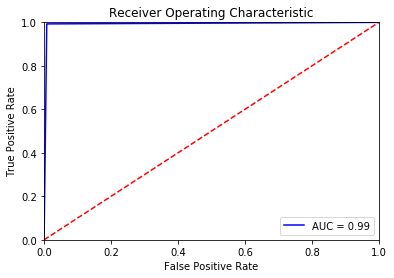

In [111]:
from sklearn.metrics import roc_curve,auc
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(my_label_vector,y_pred)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#TESTING ANOTHER METHOD AS BASELINE

In [128]:
#LGBM
import lightgbm as lgb
res_all = [[],[],[],[],[]]
auc_plots = []

cv = StratifiedKFold(n_splits=10, random_state=42,shuffle=True)
for train_ind, test_ind in cv.split(X_res2, y_res2):
  #Train the model
  X_train,y_train = X_res2.iloc[train_ind,:],y_res2[train_ind]
  X_test,y_test = X_res2.iloc[test_ind,:],y_res2[test_ind]

  #Fitting model
  lgbc = lgb.LGBMClassifier(random_state = 123)
  lgbc.fit(X_train,y_train)

  #Predict
  y_predict_lgbc = lgbc.predict(X_test)

  #Calculate metrics
  accu = accuracy_score(y_test, y_predict_lgbc)
  auc = roc_auc_score(y_test, y_predict_lgbc)
  precision_score,recall_score, f1_score,_ = precision_recall_fscore_support(y_test, y_predict_lgbc, average='binary',pos_label=1)
  _,speci,_,_ = precision_recall_fscore_support(y_test, y_predict_lgbc, average='binary',pos_label=0)

  res_all[0].append(accu);res_all[1].append(recall_score);res_all[2].append(precision_score);res_all[3].append(auc);res_all[4].append(f1_score)
  fpr, tpr, _ = roc_curve(y_test,  y_predict_lgbc)
  auc_plots.append([fpr,tpr,auc])
 
#Average and Stdv of k-fold CV
print('Average Result of {} CV'.format(10))
print('Accuracy    : {0:.5f}±{1:.3f}'.format(np.mean(res_all[0]), np.std(res_all[0])))
print('Recall      : {0:.5f}±{1:.3f}'.format(np.mean(res_all[1]), np.std(res_all[1])))
print('Precision   : {0:.5f}±{1:.3f}'.format(np.mean(res_all[2]), np.std(res_all[2])))
print('ROC-AUC     : {0:.5f}±{1:.3f}'.format(np.mean(res_all[3]), np.std(res_all[3])))
print('F1 Score    : {0:.5f}±{1:.3f}'.format(np.mean(res_all[4]), np.std(res_all[4])))
print('===================================')

#Choose auc plot with highest score
best_auc_dnn = auc_plots[np.array(res_all[3]).argmax()]
res_all_dnn = res_all


Average Result of 10 CV
Accuracy    : 0.97339±0.003
Recall      : 0.91711±0.013
Precision   : 0.92286±0.010
ROC-AUC     : 0.95088±0.007
F1 Score    : 0.91990±0.008


In [140]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB

res_all = [[],[],[],[],[]]
auc_plots = []

cv = StratifiedKFold(n_splits=10, random_state=42,shuffle=True)
for train_ind, test_ind in cv.split(X_res2, y_res2):
  #Train the model
  X_train,y_train = X_res2.iloc[train_ind,:],y_res2[train_ind]
  X_test,y_test = X_res2.iloc[test_ind,:],y_res2[test_ind]

  #Fitting model
  NB = GaussianNB()
  NB.fit(X_train,y_train)

  #Predict
  y_predict_nb = NB.predict(X_test)

  #Calculate metrics
  accu = accuracy_score(y_test, y_predict_nb)
  auc = roc_auc_score(y_test, y_predict_nb)
  precision_score,recall_score, f1_score,_ = precision_recall_fscore_support(y_test, y_predict_nb, average='binary',pos_label=1)
  _,speci,_,_ = precision_recall_fscore_support(y_test, y_predict_nb, average='binary',pos_label=0)

  res_all[0].append(accu);res_all[1].append(recall_score);res_all[2].append(precision_score);res_all[3].append(auc);res_all[4].append(f1_score)
  fpr, tpr, _ = roc_curve(y_test,  y_predict_nb)
  auc_plots.append([fpr,tpr,auc])
 
#Average and Stdv of k-fold CV
print('Average Result of {} CV'.format(10))
print('Accuracy    : {0:.5f}±{1:.3f}'.format(np.mean(res_all[0]), np.std(res_all[0])))
print('Recall      : {0:.5f}±{1:.3f}'.format(np.mean(res_all[1]), np.std(res_all[1])))
print('Precision   : {0:.5f}±{1:.3f}'.format(np.mean(res_all[2]), np.std(res_all[2])))
print('ROC-AUC     : {0:.5f}±{1:.3f}'.format(np.mean(res_all[3]), np.std(res_all[3])))
print('F1 Score    : {0:.5f}±{1:.3f}'.format(np.mean(res_all[4]), np.std(res_all[4])))
print('===================================')

#Choose auc plot with highest score
best_auc_dnn = auc_plots[np.array(res_all[3]).argmax()]
res_all_dnn = res_all


Average Result of 10 CV
Accuracy    : 0.80383±0.009
Recall      : 0.41051±0.049
Precision   : 0.41086±0.026
ROC-AUC     : 0.64650±0.023
F1 Score    : 0.40993±0.034


In [141]:
from sklearn.ensemble import GradientBoostingClassifier

res_all = [[],[],[],[],[]]
auc_plots = []

cv = StratifiedKFold(n_splits=10, random_state=42,shuffle=True)
for train_ind, test_ind in cv.split(X_res2, y_res2):
  #Train the model
  X_train,y_train = X_res2.iloc[train_ind,:],y_res2[train_ind]
  X_test,y_test = X_res2.iloc[test_ind,:],y_res2[test_ind]

  #Fitting model
  GBC = GradientBoostingClassifier(random_state=123)
  GBC.fit(X_train,y_train)

  #Predict
  y_predict_gbc = GBC.predict(X_test)

  #Calculate metrics
  accu = accuracy_score(y_test, y_predict_gbc)
  auc = roc_auc_score(y_test, y_predict_gbc)
  precision_score,recall_score, f1_score,_ = precision_recall_fscore_support(y_test, y_predict_gbc, average='binary',pos_label=1)
  _,speci,_,_ = precision_recall_fscore_support(y_test, y_predict_gbc, average='binary',pos_label=0)

  res_all[0].append(accu);res_all[1].append(recall_score);res_all[2].append(precision_score);res_all[3].append(auc);res_all[4].append(f1_score)
  fpr, tpr, _ = roc_curve(y_test,  y_predict_gbc)
  auc_plots.append([fpr,tpr,auc])
 
#Average and Stdv of k-fold CV
print('Average Result of {} CV'.format(10))
print('Accuracy    : {0:.5f}±{1:.3f}'.format(np.mean(res_all[0]), np.std(res_all[0])))
print('Recall      : {0:.5f}±{1:.3f}'.format(np.mean(res_all[1]), np.std(res_all[1])))
print('Precision   : {0:.5f}±{1:.3f}'.format(np.mean(res_all[2]), np.std(res_all[2])))
print('ROC-AUC     : {0:.5f}±{1:.3f}'.format(np.mean(res_all[3]), np.std(res_all[3])))
print('F1 Score    : {0:.5f}±{1:.3f}'.format(np.mean(res_all[4]), np.std(res_all[4])))
print('===================================')

#Choose auc plot with highest score
best_auc_dnn = auc_plots[np.array(res_all[3]).argmax()]
res_all_dnn = res_all


Average Result of 10 CV
Accuracy    : 0.94242±0.003
Recall      : 0.82592±0.013
Precision   : 0.82866±0.017
ROC-AUC     : 0.89582±0.005
F1 Score    : 0.82706±0.006


In [15]:
#RF Baseline
res_all = [[],[],[],[],[]]
auc_plots = []

cv = StratifiedKFold(n_splits=10, random_state=42,shuffle=True)
for train_ind, test_ind in cv.split(X_res2, y_res2):
  #Train the model
  X_train,y_train = X_res2.iloc[train_ind,:],y_res2[train_ind]
  X_test,y_test = X_res2.iloc[test_ind,:],y_res2[test_ind]

  #Fitting model
  rfc = RandomForestClassifier(random_state = 123)
  rfc.fit(X_train,y_train)

  #Predict
  y_predict_rfc = rfc.predict(X_test)

  #Calculate metrics
  accu = accuracy_score(y_test, y_predict_rfc)
  auc = roc_auc_score(y_test, y_predict_rfc)
  precision_score,recall_score, f1_score,_ = precision_recall_fscore_support(y_test, y_predict_rfc, average='binary',pos_label=1)
  _,speci,_,_ = precision_recall_fscore_support(y_test, y_predict_rfc, average='binary',pos_label=0)

  res_all[0].append(accu);res_all[1].append(recall_score);res_all[2].append(precision_score);res_all[3].append(auc);res_all[4].append(f1_score)
  fpr, tpr, _ = roc_curve(y_test,  y_predict_rfc)
  auc_plots.append([fpr,tpr,auc])
 
#Average and Stdv of k-fold CV
print('Average Result of {} CV'.format(10))
print('Accuracy    : {0:.5f}±{1:.3f}'.format(np.mean(res_all[0]), np.std(res_all[0])))
print('Recall      : {0:.5f}±{1:.3f}'.format(np.mean(res_all[1]), np.std(res_all[1])))
print('Precision   : {0:.5f}±{1:.3f}'.format(np.mean(res_all[2]), np.std(res_all[2])))
print('ROC-AUC     : {0:.5f}±{1:.3f}'.format(np.mean(res_all[3]), np.std(res_all[3])))
print('F1 Score    : {0:.5f}±{1:.3f}'.format(np.mean(res_all[4]), np.std(res_all[4])))
print('===================================')

#Choose auc plot with highest score
best_auc_dnn = auc_plots[np.array(res_all[3]).argmax()]
res_all_dnn = res_all


Average Result of 10 CV
Accuracy    : 0.97910±0.002
Recall      : 0.91980±0.010
Precision   : 0.95320±0.008
ROC-AUC     : 0.95538±0.005
F1 Score    : 0.93616±0.007


In [16]:
#XGB Baseline
res_all = [[],[],[],[],[]]
auc_plots = []

cv = StratifiedKFold(n_splits=10, random_state=42,shuffle=True)
for train_ind, test_ind in cv.split(X_res2, y_res2):
  #Train the model
  X_train,y_train = X_res2.iloc[train_ind,:],y_res2[train_ind]
  X_test,y_test = X_res2.iloc[test_ind,:],y_res2[test_ind]

  #Fitting model
  xgbc = xgb.XGBClassifier(random_state=0)
  xgbc.fit(X_train,y_train)

  #Predict
  y_predict_xbgc = xgbc.predict(X_test)

  #Calculate metrics
  accu = accuracy_score(y_test, y_predict_xbgc)
  auc = roc_auc_score(y_test, y_predict_xbgc)
  precision_score,recall_score, f1_score,_ = precision_recall_fscore_support(y_test, y_predict_xbgc, average='binary',pos_label=1)
  _,speci,_,_ = precision_recall_fscore_support(y_test, y_predict_xbgc, average='binary',pos_label=0)

  res_all[0].append(accu);res_all[1].append(recall_score);res_all[2].append(precision_score);res_all[3].append(auc);res_all[4].append(f1_score)
  fpr, tpr, _ = roc_curve(y_test,  y_predict_xbgc)
  auc_plots.append([fpr,tpr,auc])
 
#Average and Stdv of k-fold CV
print('Average Result of {} CV'.format(10))
print('Accuracy    : {0:.5f}±{1:.3f}'.format(np.mean(res_all[0]), np.std(res_all[0])))
print('Recall      : {0:.5f}±{1:.3f}'.format(np.mean(res_all[1]), np.std(res_all[1])))
print('Precision   : {0:.5f}±{1:.3f}'.format(np.mean(res_all[2]), np.std(res_all[2])))
print('ROC-AUC     : {0:.5f}±{1:.3f}'.format(np.mean(res_all[3]), np.std(res_all[3])))
print('F1 Score    : {0:.5f}±{1:.3f}'.format(np.mean(res_all[4]), np.std(res_all[4])))
print('===================================')

#Choose auc plot with highest score
best_auc_dnn = auc_plots[np.array(res_all[3]).argmax()]
res_all_dnn = res_all


Average Result of 10 CV
Accuracy    : 0.97698±0.003
Recall      : 0.92641±0.009
Precision   : 0.93496±0.012
ROC-AUC     : 0.95675±0.005
F1 Score    : 0.93064±0.009
